# **Introduction**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Fraud Detection Dataset.csv')
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0


# ***Exploratory Data Analysis***

Since our main goal is to fully explore the data and find every important feature, which might help the model to predict the accuracy. Firstly, let's handle missing values, and then try to explore categorical and numerical data

In [ ]:
print("Shape:", df.shape, '\n')
print("Data Types:", df.dtypes, '\n')
for col in df.columns:
    print(f"Unique Data Of The {col}:", df[col].unique())

Shape: (51000, 12) 

Data Types: Transaction_ID                       object
User_ID                               int64
Transaction_Amount                  float64
Transaction_Type                     object
Time_of_Transaction                 float64
Device_Used                          object
Location                             object
Previous_Fraudulent_Transactions      int64
Account_Age                           int64
Number_of_Transactions_Last_24H       int64
Payment_Method                       object
Fraudulent                            int64
dtype: object 

Unique Data Of The Transaction_ID: ['T1' 'T2' 'T3' ... 'T49998' 'T49999' 'T50000']
Unique Data Of The User_ID: [4174 4507 1860 ... 4616 2261 4210]
Unique Data Of The Transaction_Amount: [1292.76 1554.58 2395.02 ...  647.11 2446.65 2867.43]
Unique Data Of The Transaction_Type: ['ATM Withdrawal' 'Bill Payment' 'POS Payment' 'Bank Transfer'
 'Online Purchase']
Unique Data Of The Time_of_Transaction: [16. 13. nan 15. 19.  2

In [ ]:
print('Nan Type Values:\n', df.isnull().sum())

Nan Type Values:
 Transaction_ID                         0
User_ID                                0
Transaction_Amount                  2520
Transaction_Type                       0
Time_of_Transaction                 2552
Device_Used                         2473
Location                            2547
Previous_Fraudulent_Transactions       0
Account_Age                            0
Number_of_Transactions_Last_24H        0
Payment_Method                      2469
Fraudulent                             0
dtype: int64


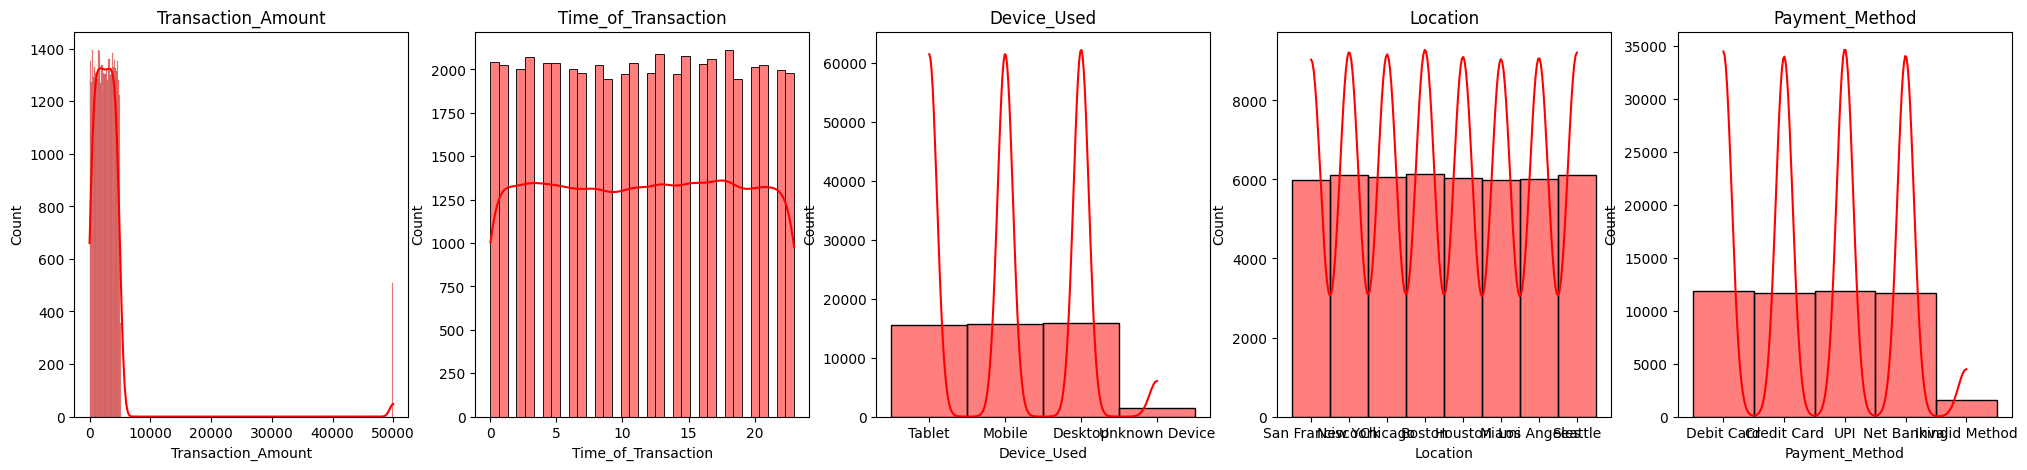

<Figure size 1000x1000 with 0 Axes>

In [ ]:
missing_cols = [col for col in df.columns if df[col].isnull().sum() > 0]

fig, axes = plt.subplots(1, len(missing_cols), figsize=(5 * len(missing_cols), 5))

if len(missing_cols) == 1:
    axes = [axes]

for ax, col in zip(axes, missing_cols):
    sns.histplot(df[col], kde=True, ax=ax, color='red')
    ax.set_title(col)

plt.figure(figsize=(10, 10))
plt.tight_layout()
plt.show()

Handling missing values with some random constant string is best in this situation, because only columns which contain numerical features are Transaction_Amount and Time_of_Transaction. So we will handle the categorical featured columns by replacing Nan with constant string, and numerical by replacing mean


In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna('Unknown')
    else:
        df[col] = df[col].fillna(df[col].mean())

In [ ]:
df.isnull().sum()

,0
Transaction_ID,0
User_ID,0
Transaction_Amount,0
Transaction_Type,0
Time_of_Transaction,0
Device_Used,0
Location,0
Previous_Fraudulent_Transactions,0
Account_Age,0
Number_of_Transactions_Last_24H,0


Now lets review Transaction_ID and User_ID, because their importance in the modelling is questionable

In [ ]:
print("Unique Data of Transaction_ID:", len(df['Transaction_ID'].unique()))
print("Unique Data Of User_ID:", len(df['User_ID'].unique()))

Unique Data of Transaction_ID: 50000
Unique Data Of User_ID: 4000


All of the values in the transaction column is not important for the prediction, so we can drop them out of the dataset. But the User_ID column holds important information, because one account is used per fraud, so our model will notice it


In [ ]:
df.drop(['Transaction_ID'], axis=1, inplace=True)

Now its time for the statistical review. Since we still have the 'object' type features, we must try encoding. For EDA, the best encoding is LabelEncoder, because we can fully review the options. Other type of encodings will create too much columns, which will mess up the statistics. For modelling, we can use OneHotEncoding.

# ***Data Preprocessing***

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_eda = df.copy()
df_train = df.copy()

categorical_features = ['Transaction_Type', 'Device_Used', 'Location', 'Payment_Method']

for col in categorical_features:
    df_eda[col] = le.fit_transform(df_eda[col])

df_train = pd.get_dummies(df_train, columns=categorical_features)

In [ ]:
print('Train Dataset:')
df_train.head()

Train Dataset:


,User_ID,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Fraudulent,Transaction_Type_ATM Withdrawal,Transaction_Type_Bank Transfer,Transaction_Type_Bill Payment,...,Location_New York,Location_San Francisco,Location_Seattle,Location_Unknown,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_Invalid Method,Payment_Method_Net Banking,Payment_Method_UPI,Payment_Method_Unknown
0,4174,1292.76,16.0000,0,119,13,0,True,False,False,...,False,True,False,False,False,True,False,False,False,False
1,4507,1554.58,13.0000,4,79,3,0,True,False,False,...,True,False,False,False,True,False,False,False,False,False
2,1860,2395.02,11.4884,3,115,9,0,True,False,False,...,False,False,False,True,False,False,False,False,False,True
3,2294,100.10,15.0000,4,3,4,0,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,2130,1490.50,19.0000,2,57,7,0,False,False,False,...,False,True,False,False,True,False,False,False,False,False


In [ ]:
print('EDA Dataset:')
df_eda.head()

EDA Dataset:


,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,4174,1292.76,0,16.0000,2,6,0,119,13,1,0
1,4507,1554.58,0,13.0000,1,5,4,79,3,0,0
2,1860,2395.02,0,11.4884,1,8,3,115,9,5,0
3,2294,100.10,2,15.0000,0,1,4,3,4,4,0
4,2130,1490.50,4,19.0000,1,6,2,57,7,0,0


Now, lets check out correlations between features. Lets make figure of this heatmap 12x12, because we have 12 feature.

<Axes: >

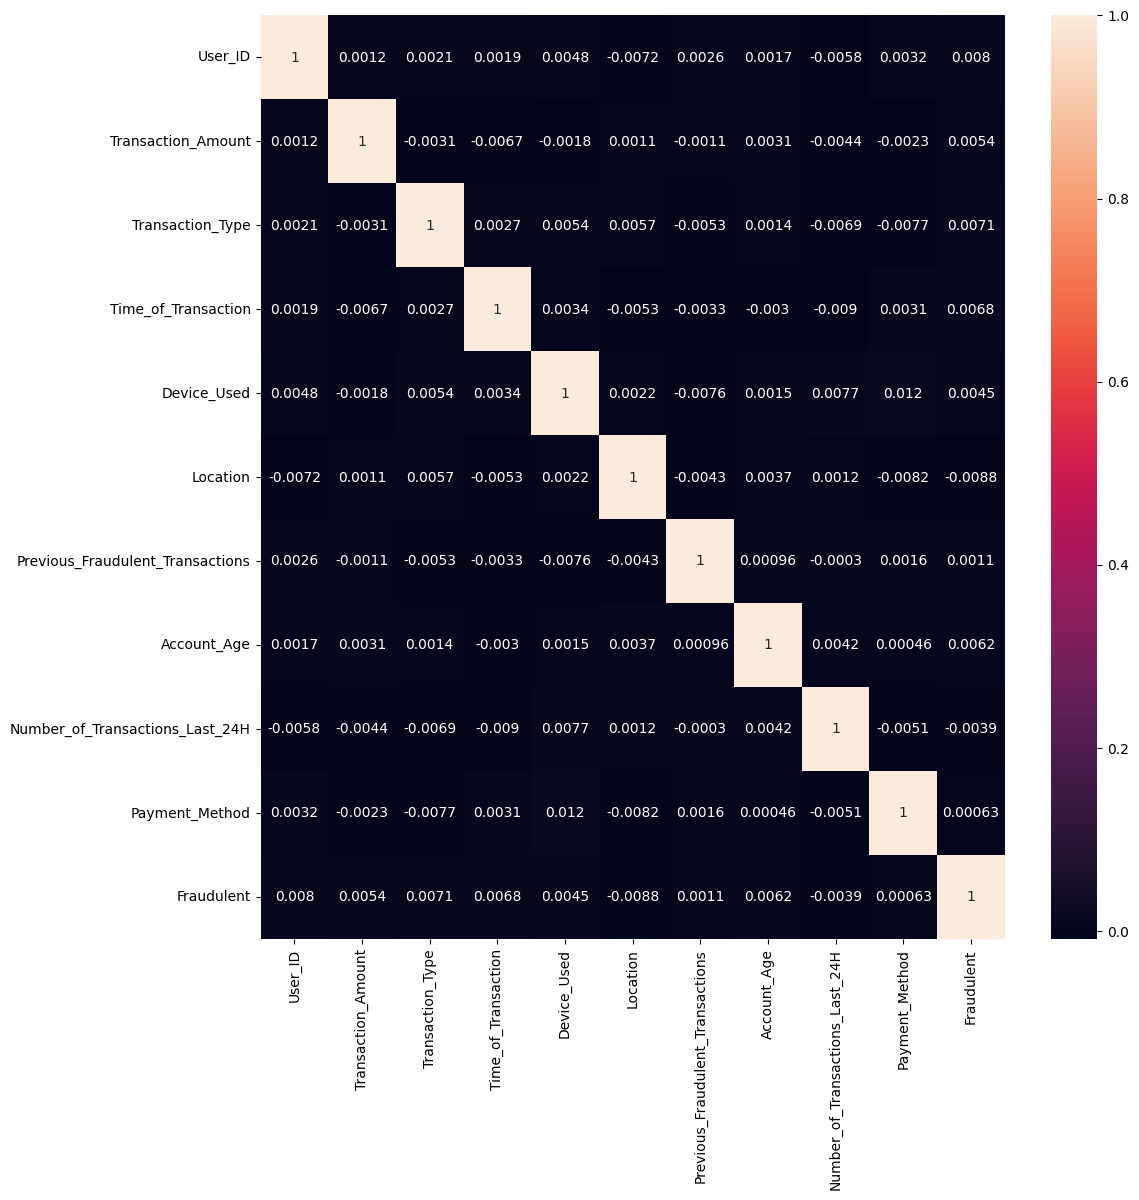

In [ ]:
plt.figure(figsize=(12,12))

sns.heatmap(df_eda.corr(), annot=True)

The correlation between target variable and features are too low. There might be several reasons for it, but main problem, which could be the problem of the dataset is Randomness/Outliers. Lets overview boxplots and check if the data is too noisy.

# ***Main Problem Of The Dataset***

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(df_eda.drop(['Fraudulent'], axis=1), df_eda['Fraudulent'])
print(mi_scores)

[0.00000000e+00 5.52887342e-05 2.27708656e-03 8.32189164e-04
 5.90806350e-04 2.42240517e-03 1.38597054e-03 0.00000000e+00
 5.23974099e-05 2.29553800e-03]


MI Scores of several columns are zero, which might suggest the that these features are irrelevant to target variable

In [ ]:
important_features = df_eda.drop(['Fraudulent'], axis=1).columns[mi_scores > 0]
important_features

Index(['Transaction_Amount', 'Transaction_Type', 'Time_of_Transaction',
       'Device_Used', 'Location', 'Previous_Fraudulent_Transactions',
       'Number_of_Transactions_Last_24H', 'Payment_Method'],
      dtype='object')

Lets check boxplots if theres outliers in data

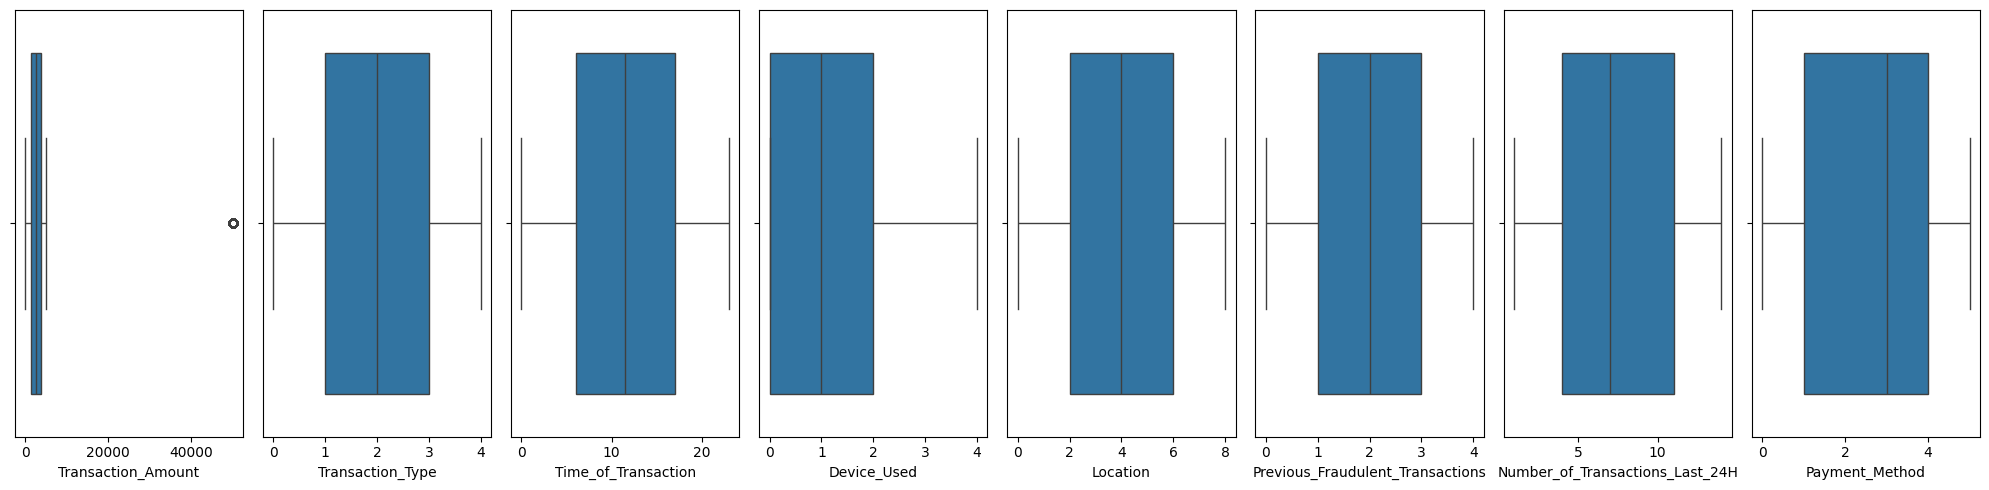

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=len(important_features), figsize=(20, 5))

for ax, col in zip(axes, important_features):
    sns.boxplot(x=df_eda[col], ax=ax)

plt.tight_layout()
plt.show()

The conclusion which we made from the Exploratory Data Analysis is that the dataset has unbalanced labels for target variable. Problem can be handled by several methods:


*  Oversampling Minority Class with SMOTE (Best for Small Datasets)
*  Undersampling Majority Class (Risky but Fast)
*  Adjusting Class Weights (Best for Large Datasets)
*  Anomaly Detection (Used for Fraud/Failure Detection)









# ***Modelling with Classic Machine Learning Algorithms***

In [ ]:
df_train.shape

(51000, 32)

In [ ]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.3 MB/s eta 0:00:00


Training Models:   0%|          | 0/8 [00:00<?, ?it/s]

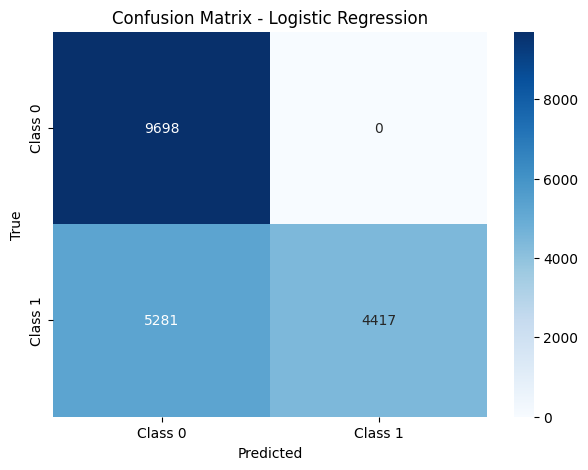

Training Models:  12%|█▎        | 1/8 [00:02<00:17,  2.55s/it]

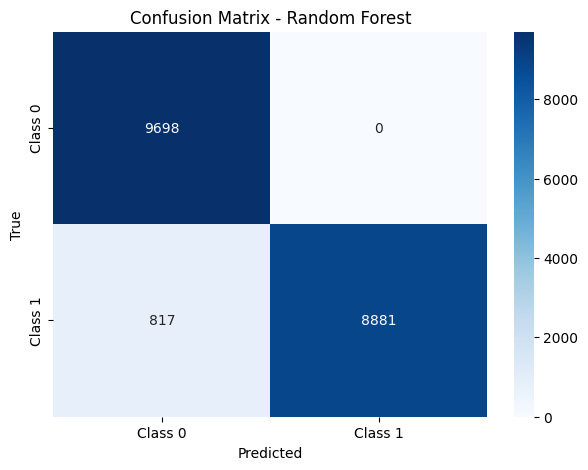

Training Models:  25%|██▌       | 2/8 [00:43<02:30, 25.00s/it]

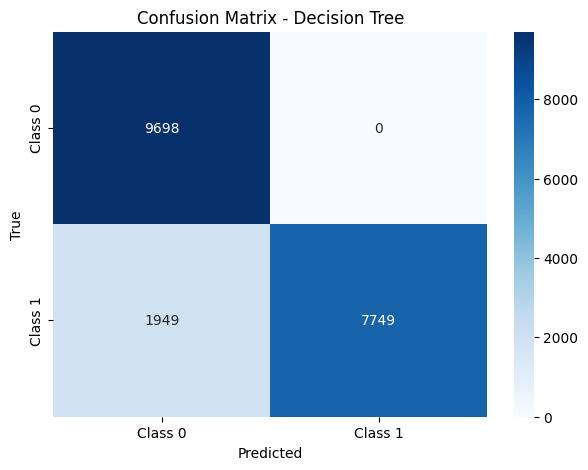

Training Models:  38%|███▊      | 3/8 [00:44<01:09, 13.96s/it]

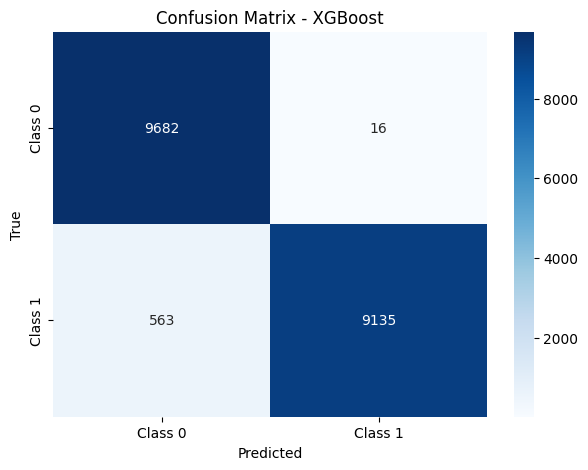

Training Models:  50%|█████     | 4/8 [00:52<00:46, 11.58s/it]

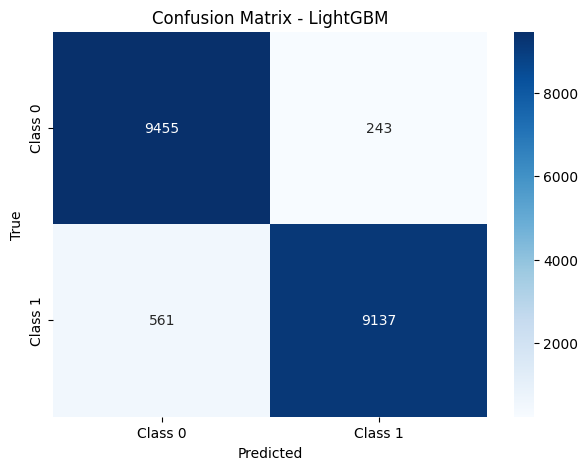

Training Models:  62%|██████▎   | 5/8 [01:01<00:32, 10.89s/it]

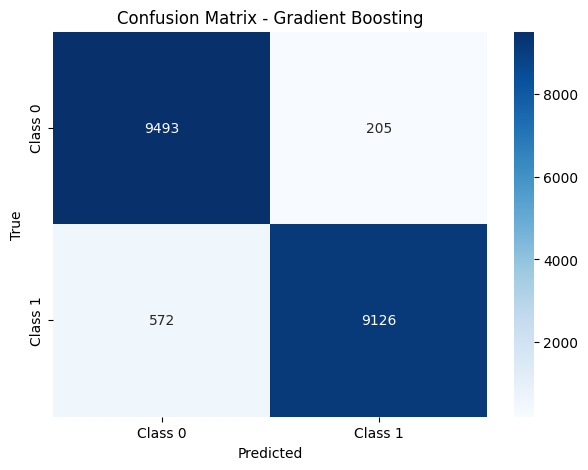

Training Models:  75%|███████▌  | 6/8 [05:59<03:36, 108.28s/it]

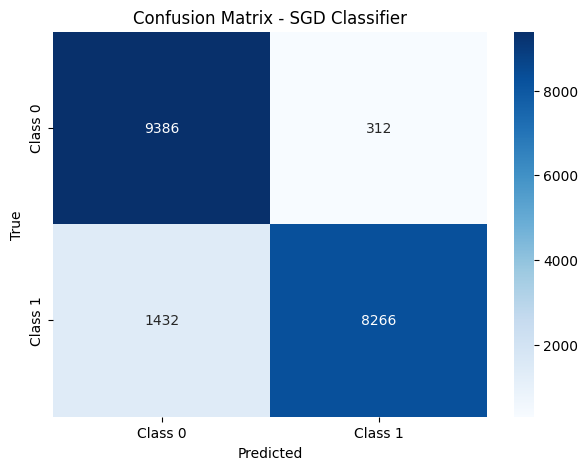

Training Models:  88%|████████▊ | 7/8 [06:02<01:13, 73.90s/it] 

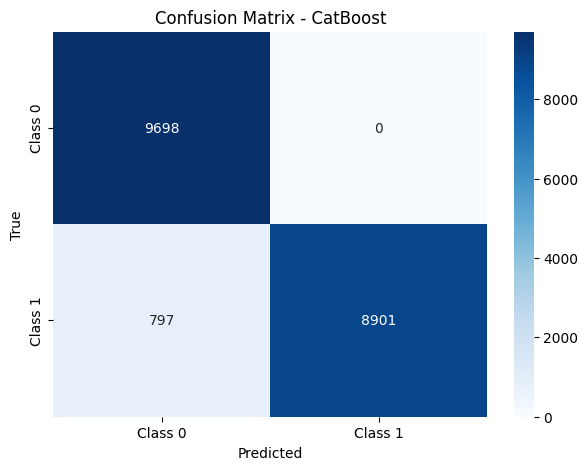

Training Models: 100%|██████████| 8/8 [06:20<00:00, 47.54s/it]

                 Model  Accuracy  F1 Score   ROC AUC
3              XGBoost  0.970148  0.970125  0.970148
5    Gradient Boosting  0.959940  0.959926  0.959940
7             CatBoost  0.958909  0.958840  0.958909
4             LightGBM  0.958548  0.958537  0.958548
1        Random Forest  0.957878  0.957803  0.957878
6       SGD Classifier  0.910085  0.909784  0.910085
2        Decision Tree  0.899515  0.898490  0.899515
0  Logistic Regression  0.727727  0.705927  0.727727


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
import pandas as pd
from tqdm import tqdm

scaler = StandardScaler()

X = df_train.drop(['Fraudulent'], axis=1)
Y = df_train['Fraudulent']
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X, Y)
X_scaled = scaler.fit_transform(X_train_resampled)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_train_resampled, test_size=0.2, random_state=42, stratify=y_train_resampled)

models = {
    "Logistic Regression": LogisticRegression(C=1.0, solver="liblinear", max_iter=500, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(n_estimators=300, max_depth=12, min_samples_split=5, class_weight="balanced_subsample", random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=10, criterion="gini", class_weight="balanced", random_state=42),
    "XGBoost": XGBClassifier(n_estimators=500, learning_rate=0.03, max_depth=7, scale_pos_weight=5, subsample=0.8, colsample_bytree=0.8, eval_metric="logloss", use_label_encoder=False),
    "LightGBM": LGBMClassifier(n_estimators=500, learning_rate=0.03, max_depth=7, num_leaves=60, min_data_in_leaf=5, force_col_wise=True, scale_pos_weight=5, verbose=-1),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=500, learning_rate=0.03, max_depth=7, min_samples_split=5),"SGD Classifier": SGDClassifier(loss="log_loss", penalty="l2", alpha=0.0001, max_iter=2000, tol=1e-4, class_weight="balanced"),
    "CatBoost": CatBoostClassifier(iterations=500, learning_rate=0.03, depth=7, l2_leaf_reg=5, scale_pos_weight=5, verbose=0),
}

results = []
for name, model in tqdm(models.items(), desc="Training Models", total=len(models)):
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    roc_auc = roc_auc_score(y_test, y_pred)

    results.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1, "ROC AUC": roc_auc})

    plot_confusion_matrix(y_test, y_pred, name)
    results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
print(results_df)

In [ ]:
results_df

,Model,Accuracy,F1 Score,ROC AUC
3,XGBoost,0.970148,0.970125,0.970148
5,Gradient Boosting,0.959940,0.959926,0.959940
7,CatBoost,0.958909,0.958840,0.958909
4,LightGBM,0.958548,0.958537,0.958548
1,Random Forest,0.957878,0.957803,0.957878
6,SGD Classifier,0.910085,0.909784,0.910085
2,Decision Tree,0.899515,0.898490,0.899515
0,Logistic Regression,0.727727,0.705927,0.727727


Since the imbalance continues, lets try using isolation forest, which is best way to handle imbalanced data

IMPORTANT: isolation forest should be used on standart data, not on SMOTE data

# ***Isolation Forest***


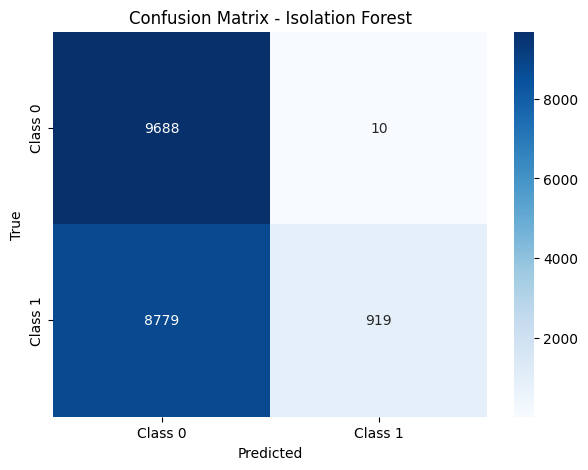

In [ ]:
from sklearn.ensemble import IsolationForest

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_train_resampled, test_size=0.2, random_state=42, stratify=y_train_resampled)

iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(X_train)

y_pred_train = iso_forest.predict(X_train)
y_pred_test = iso_forest.predict(X_test)

y_pred_test = [1 if x == -1 else 0 for x in y_pred_test]

cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix - Isolation Forest")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Isolation Forest gave little bit better performance on Class 1 (27 Right), but lets try better fixing the issue arised in the imbalanced data

One of the good solutions for this problem is AutoEncoders, which is one of the best way to anomaly detection But since we handled imbalance with SMOTE, we can use casual NeuralNetworks for our prediction


# ***Deep Neural Network Architecture***

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
import tensorflow as tf

Also note, that using GPU for NN architecture is best solution

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU not found. Using CPU.')
else:
    print(f'GPU found: {device_name}')

GPU not found. Using CPU.


In [ ]:
X = df_train.drop(['Fraudulent'], axis=1)
Y = df_train['Fraudulent']
X, Y = smote.fit_resample(X, Y)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42, stratify=Y)

model = Sequential([
    Dense(512, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.4),
    BatchNormalization(),

    Dense(256, activation='relu'),
    Dropout(0.4),
    BatchNormalization(),

    Dense(128, activation='relu'),
    Dropout(0.3),
    BatchNormalization(),
     Dense(64, activation='relu'),
    Dropout(0.3),
    BatchNormalization(),

    Dense(32, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),

    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test), verbose=1)

y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")

Epoch 1/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.8259 - loss: 0.3896 - val_accuracy: 0.9622 - val_loss: 0.1410
Epoch 2/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9624 - loss: 0.1458 - val_accuracy: 0.9688 - val_loss: 0.1189
Epoch 3/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9647 - loss: 0.1351 - val_accuracy: 0.9707 - val_loss: 0.1149
Epoch 4/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9676 - loss: 0.1274 - val_accuracy: 0.9708 - val_loss: 0.1138
Epoch 5/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9673 - loss: 0.1262 - val_accuracy: 0.9710 - val_loss: 0.1131
Epoch 6/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9706 - loss: 0.1164 - val_accuracy: 0.9710 - val_loss: 0.1127
Epoch 7/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9689 - loss: 0.1210 - val_accuracy: 0.9710 - val_loss: 0.1127
Epoch 8/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9690 - loss: 0.1210 - val_

<Axes: >

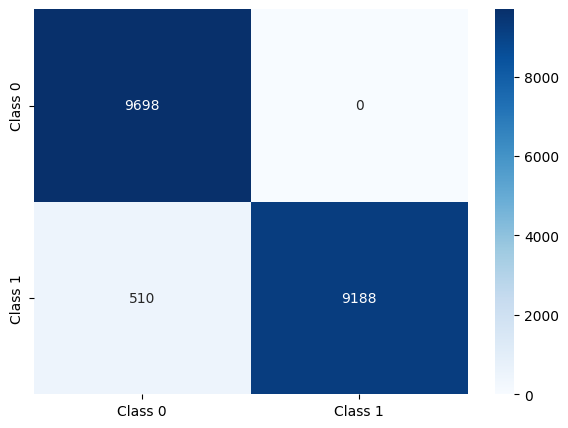

In [ ]:
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])

# ***Deeper Neural Networks Architecture***

In [ ]:
model = Sequential([
    Dense(1024, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    BatchNormalization(),

    Dense(512, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),

    Dense(256, activation='relu'),
    Dropout(0.4),
    BatchNormalization(), Dense(128, activation='relu'),
    Dropout(0.4),
    BatchNormalization(),

    Dense(64, activation='relu'),
    Dropout(0.3),
    BatchNormalization(),

    Dense(32, activation='relu'),
    Dropout(0.3),
    BatchNormalization(),

    Dense(16, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),

    Dense(8, activation='relu'),
    Dropout(0.2),
    BatchNormalization(), Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), verbose=1)

y_pred = (model.predict(X_test) > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")
roc_auc = roc_auc_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Epoch 1/100
607/607 ━━━━━━━━━━━━━━━━━━━━ 29s 35ms/step - accuracy: 0.7337 - loss: 0.5357 - val_accuracy: 0.9597 - val_loss: 0.1483
Epoch 2/100
607/607 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - accuracy: 0.9572 - loss: 0.1716 - val_accuracy: 0.9676 - val_loss: 0.1222
Epoch 3/100
607/607 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.9644 - loss: 0.1481 - val_accuracy: 0.9689 - val_loss: 0.1183
Epoch 4/100
607/607 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.9649 - loss: 0.1404 - val_accuracy: 0.9699 - val_loss: 0.1156
Epoch 5/100
607/607 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.9668 - loss: 0.1326 - val_accuracy: 0.9705 - val_loss: 0.1138
Epoch 6/100
607/607 ━━━━━━━━━━━━━━━━━━━━ 40s 35ms/step - accuracy: 0.9675 - loss: 0.1311 - val_accuracy: 0.9709 - val_loss: 0.1129
Epoch 7/100
607/607 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.9668 - loss: 0.1318 - val_accuracy: 0.9699 - val_loss: 0.1156
Epoch 8/100
607/607 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.9677 - loss: 0

<Axes: >

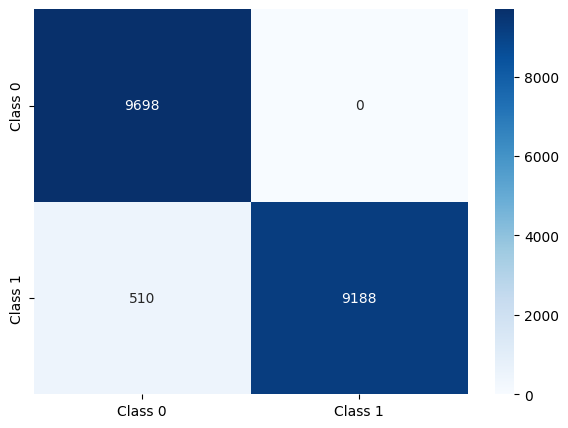

In [ ]:
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])